In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
X = np.array([5.1, 5.2, 5.3,5.4,5.5,5.6,5.7,5.8,5.9]).reshape(-1, 1)
y = np.array([50,52,56,58,62,66,68,70,75])

In [3]:
print(X)

[[5.1]
 [5.2]
 [5.3]
 [5.4]
 [5.5]
 [5.6]
 [5.7]
 [5.8]
 [5.9]]


In [4]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

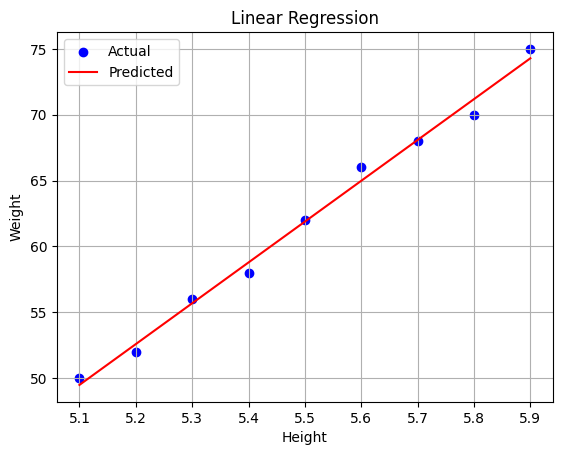

In [5]:
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
print("Linear Regression R² Score:", r2_score(y, y_pred))

Linear Regression R² Score: 0.9926166794185157


In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [9]:
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_poly_pred = poly_model.predict(X_poly)

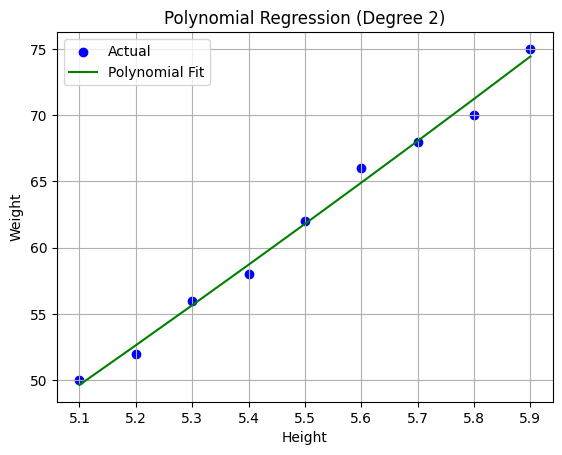

In [10]:

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_poly_pred, color='green', label='Polynomial Fit')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [12]:
iris = load_iris()
x = iris.data[:,:2]
y = (iris.target == 0).astype(int)


In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)

In [15]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 1.0
Confusion Matrix:
 [[20  0]
 [ 0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



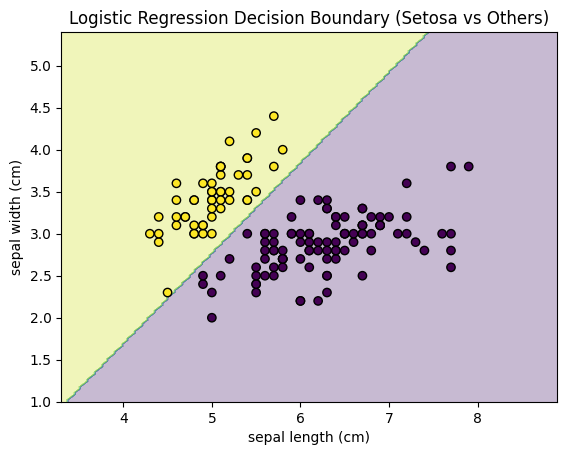

In [16]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = log_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Logistic Regression Decision Boundary (Setosa vs Others)")
plt.show()